# Titanic dataset - EDA and Preprocessing Pipelines

## Introduction

In this notebook, we will perform exploratory data analysis (EDA) on the Titanic dataset, followed by building preprocessing pipelines for numerical and categorical features.

The dataset contains information about the passengers on the Titanic, including whether they survived or not. The objective is to predict survival based on the available features, making this a **_binary classification_** problem. The dataset is sourced from Kaggle: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Let's start by importing the necessary libraries and loading the dataset as a pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('../data/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Basic information and statistics

We can use the `.info()` method to get an overview of the dataset, including the number of non-null entries and data types for each column.

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


Similarly, we can use the `.describe()` method to get summary statistics for the numerical columns in the dataset. Note that in this example, we are transposing the output for better readability.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In total we have 12 columns:
- PassengerId: Unique identifier for each passenger
- Survived: Survival status (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: Name of the passenger
- Sex: Gender of the passenger, represented as string values
- Age: Age of the passenger
- SibSp: Number of siblings/spouses aboard the Titanic
- Parch: Number of parents/children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number, represented as string values
- Embarked: Port of embarkation, represented as strings (C = Cherbourg, Q = Queenstown, S = Southampton)

In our analysis, we will ignore the columns 'PassengerId', 'Name' and 'Ticket', since they are different for each passenger and do not provide useful information for predicting survival.

## Visualization of Numerical Features

Let's proceed with visualizing the distributions of the numerical features in the dataset. Note that even if the `Pclass` and `Survived` columns are represented as integers, they are categorical in nature and will be skipped for this analysis.

To visualize the ditributions, we will use the `seaborn` library to create histograms with kernel density estimates (KDE) for each numerical column.

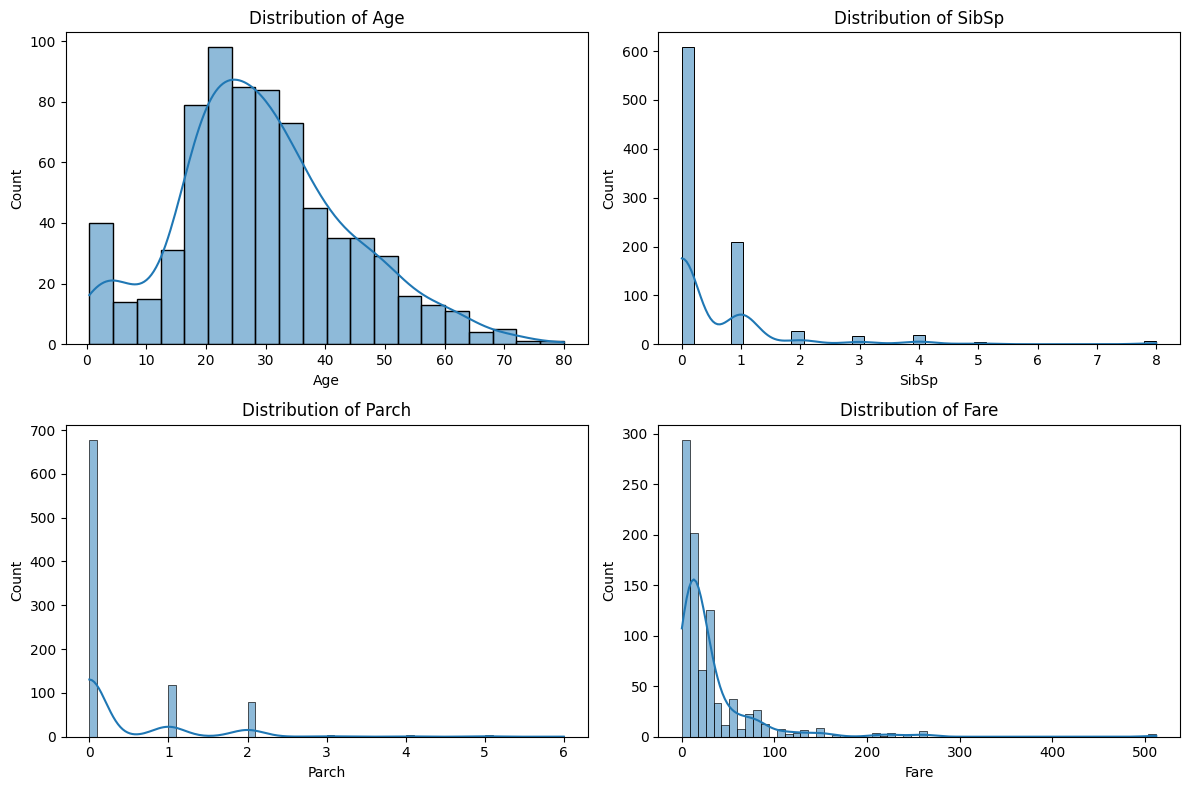

In [5]:
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# axs.ravel() flattens the 2D array of axes into a 1D array for easy iteration
# the zip function pairs each axis with a numerical column
for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

As can be seen, the distributions of the numerical features vary significantly. For example, the `Age` feature appears to be right-skewed, while the `Fare` feature has a long tail with some passengers paying very high fares. It is also important to mention that these columns have vastly different ranges of values, which will be addressed during preprocessing.

We should apply scaling techniques to our numerical features to ensure that they are on a similar scale. Additionally, for the `Fare` feature specifically, we may consider applying a power transformation to reduce the impact of extreme values and make the distribution more Gaussian-like.

## Visualization of Categorical Features

We will now visualize the distributions of the categorical features in the dataset using countplots. Countplots display the counts of observations in each categorical bin using bars. We are also skipping the `Cabin` column since it has a very high cardinality (many unique values), making it less suitable for this type of visualization.

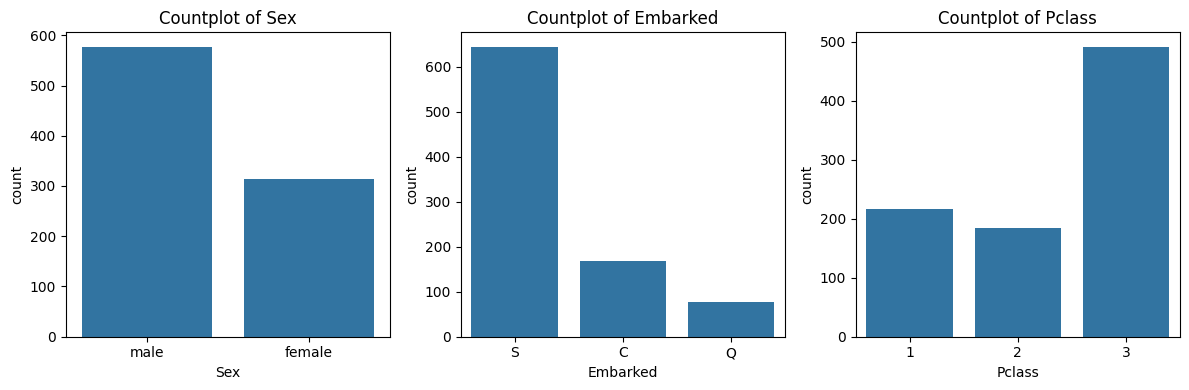

In [6]:
categorical_cols = ['Sex', 'Embarked', 'Pclass']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()

We can see that the dataset has a higher number of male passengers compared to female passengers. Additionally, most passengers embarked from Southampton (S), followed by Cherbourg (C) and Queenstown (Q). Lastly, the majority of passengers were in third class (Pclass = 3), with fewer passengers in first class (Pclass = 1) and second class (Pclass = 2).

For preprocessing categorical features, we will use one-hot encoding to convert the categorical variables into a format that can be provided to machine learning algorithms to improve predictions. This will be applied to the `Sex` and `Embarked` columns, which ar represented as string values.

## Target label distribution

Finally, let's visualize the distribution of the target label, `Survived`, to understand the class balance in the dataset.

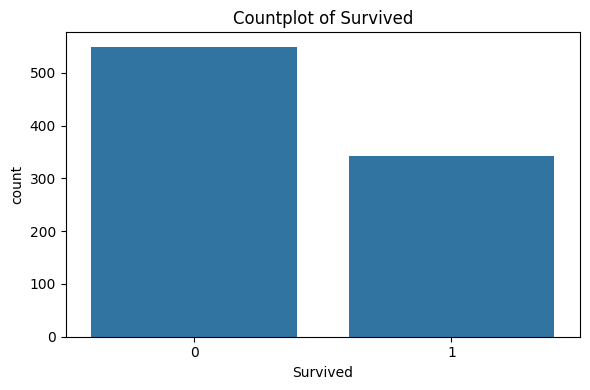

In [7]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Survived')
plt.title('Countplot of Survived')
plt.tight_layout()

We can also compare the survival counts between the rest of the features. For example, with numerical features, we can create boxplots to visualize the distribution of numerical features for survivors and non-survivors.

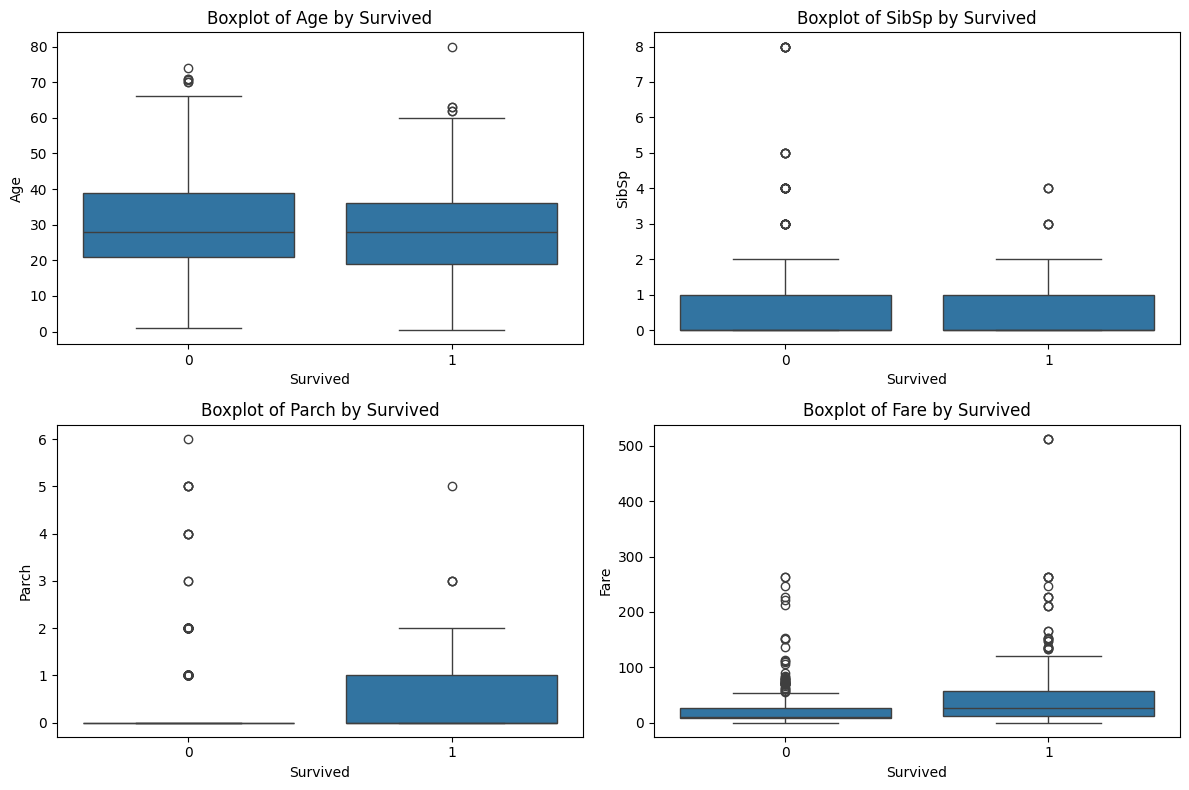

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x='Survived', y=col, ax=ax)
    ax.set_title(f'Boxplot of {col} by Survived')

fig.tight_layout()

As we can see, there are some differences in the distributions of numerical features between survivors and non-survivors. For instance, survivors paid higher fares on average compared to non-survivors. Additionally, survivors tended to be somewhat younger than non-survivors. The number of siblings/spouses aboard seems to have less impact on survival. And, regarding the number of parents/children aboard, the bulk of both survivors and non-survivors had zero parents/children aboard, but there is a slight increase in survival for those with 1-2 parents/children aboard.

For categorical features, we can create countplots with hue set to `Survived` to visualize the counts of survivors and non-survivors within each category.

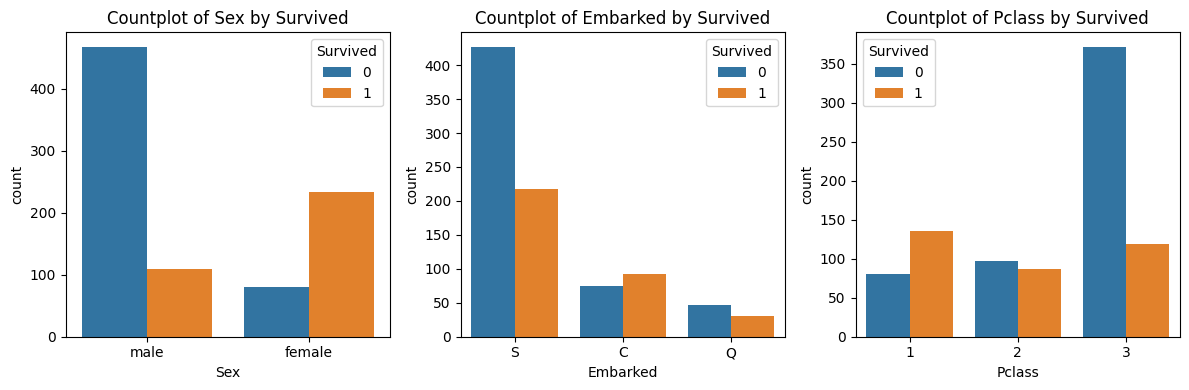

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, hue='Survived', ax=ax)
    ax.set_title(f'Countplot of {col} by Survived')

fig.tight_layout()

Some interesting observations can be made from these plots. For example, a higher proportion of female passengers survived compared to males. Additionally, passengers who embarked from Cherbourg (C) had a higher survival rate compared to those who embarked from Southampton (S) or Queenstown (Q). Lastly, first-class passengers (Pclass = 1) had a significantly higher survival rate compared to second and third-class passengers; with third-class passengers having the lowest survival rate.

We can also use a correlation matrix heatmap to visualize the correlations between all numerical columns (including `Pclass` and `Survived`).

This provides a mathematical measure to quantify the relationships observed in the previous visualizations.

Note that `Sex` and `Embarked` are not included in the correlation matrix since they are categorical features represented as strings. In the following section, we will apply one-hot encoding to these columns for preprocessing.

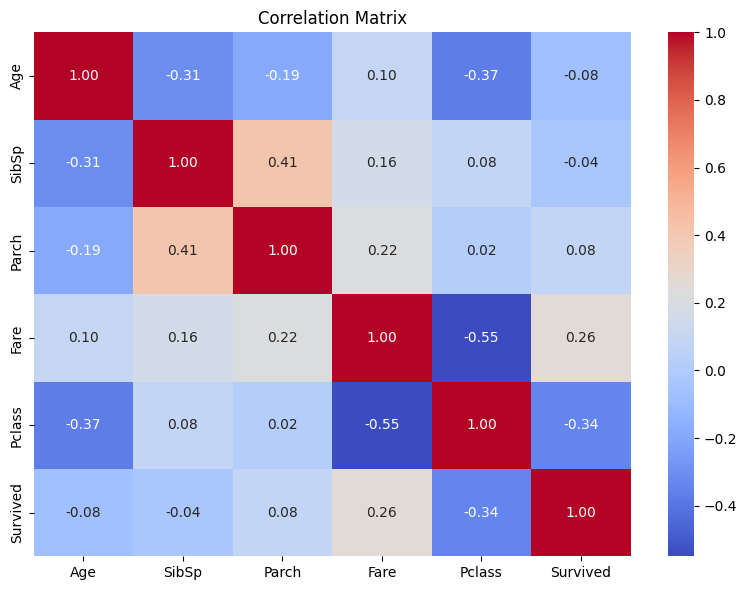

In [10]:
corr_matrix = data[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Survived']].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

## Handling Missing Values

Before building preprocessing pipelines, it is important to analyze the missing values in the dataset. We can visualize the count of missing values for each column using a bar plot.

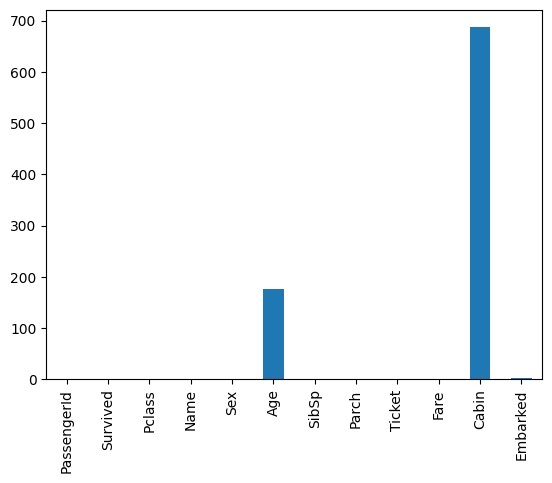

In [11]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

We can also calculate the percentage of missing values for each column to get a better understanding of the extent of missing data.

In [12]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

With the prior in mind, we need to choose appropriate strategies for handling missing values in our preprocessing pipelines. For numerical features, we can use the mean imputation strategy, while for categorical features, we can use the most frequent value imputation strategy.

More specifically, we will use the following strategies:
- **Cabin**: Drop the column entirely due to high cardinality and many missing values
- **Age**: Impute missing values with the mean of the column
- **Embarked**: Impute missing values with the most frequent value in the column



## Preprocessing pipelines

Now that we have analyzed the dataset and decided on strategies for handling missing values, we can proceed to build preprocessing pipelines for both numerical and categorical features.

We can declaratively create a preprocessing pipeline using `ColumnTransformer` to apply different transformations to numerical and categorical columns. Each of these transformations can be a pipeline itself, created using `make_pipeline`. In particular, the transformations we will apply are:
- To the `Sex` and `Embarked` categorical columns: Impute missing values with the most frequent value, followed by one-hot encoding.
- To the `Fare` numerical column: Apply a power transformation to make the distribution more Gaussian-like, followed by standard scaling.
- To the `Age`, `SibSp`, and `Parch` numerical columns: Impute missing values with the mean of the column, followed by standard scaling.
- Any remaining columns will be passed through without any changes. In this case, the only remaining column is `Pclass`, which is categorical but represented as integers.

In [13]:
preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), ['Sex', 'Embarked']),
            ('num_fare', make_pipeline(PowerTransformer(), StandardScaler()), ['Fare']),
            ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), ['Age', 'SibSp', 'Parch']),
        ],
        remainder='passthrough', # Pass through any remaining columns without changes
    )
)

Now we need to define our feature matrix `x` and target vector `y`, followed by splitting the dataset into training and testing sets. We will use an 80-20 split, with stratification based on the target variable to ensure that both sets have a similar distribution of the target classes.

Note that we are excluding the `PassengerId`, `Name`, `Ticket`, and `Cabin` columns from the feature matrix.

In [14]:
x = data[numerical_cols + categorical_cols] # Only select relevant columns
y = data['Survived']

# Split the dataset into training and testing sets
# stratify=y ensures that the class distribution is preserved in both sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

We can verify the class distribution in both the training and testing sets to ensure that stratification worked as intended.

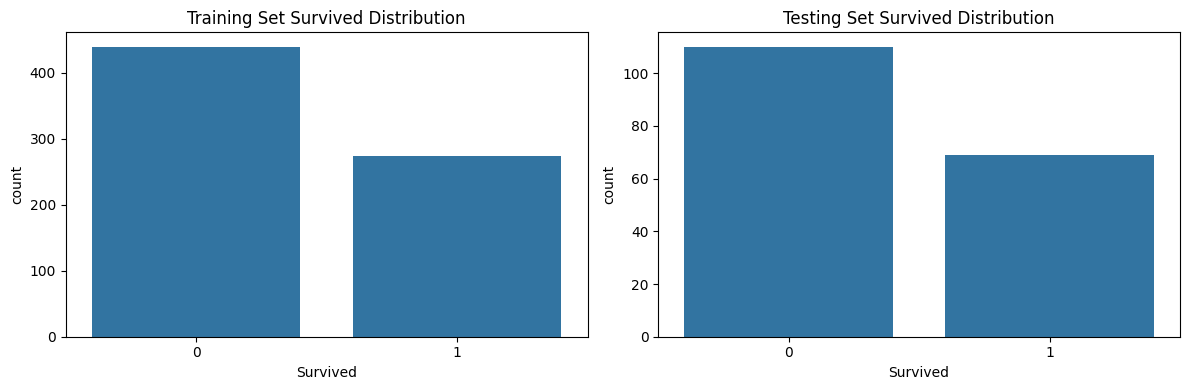

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set Survived Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set Survived Distribution')
fig.tight_layout()

To apply the preprocessing pipeline, we can use the `fit_transform` method on the training data to fit the pipeline and transform the data in one step. For the testing data, we will use the `transform` method to apply the same transformations learned from the training data.

**Important Note**: Never call `fit` or `fit_transform` on the test data, as this would lead to data leakage and invalidate the evaluation of the model.

In [16]:
x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
x_train_processed

array([[ 0.        ,  1.        ,  0.        , ..., -0.46508428,
        -0.46618317,  3.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.46508428,
        -0.46618317,  2.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.46508428,
        -0.46618317,  1.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.47833454,
         3.11571343,  3.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.46508428,
        -0.46618317,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.46508428,
        -0.46618317,  1.        ]], shape=(712, 10))

In [17]:
x_test_processed = preprocessing_pipeline.transform(x_test)
x_test_processed

array([[ 0.        ,  1.        ,  0.        , ...,  1.42175336,
        -0.46618317,  3.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.46508428,
         0.72778236,  3.        ],
       [ 0.        ,  1.        ,  1.        , ..., -0.46508428,
        -0.46618317,  3.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.46508428,
        -0.46618317,  2.        ],
       [ 1.        ,  0.        ,  1.        , ..., -0.46508428,
        -0.46618317,  2.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.47833454,
         0.72778236,  2.        ]], shape=(179, 10))

## Building a Classification Model

Now that we have our preprocessing pipeline set up, we can build a classification model using logistic regression. We will create a complete pipeline that includes both the preprocessing steps and the logistic regression model.

This is important because it ensures that the same preprocessing steps are applied to any new data before making predictions. By including the preprocessing pipeline within the model pipeline, our model will be able to handle raw input data directly.

In sklearn, we can create a new pipeline that combines the preprocessing pipeline with the logistic regression model using `make_pipeline`.

In [18]:
classification_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression()
)

The `classification_model` object is now a complete pipeline that first preprocesses the input data and then applies logistic regression for classification. If we output the steps of the pipeline, we can see the individual components that make up the complete model.

In [19]:
classification_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

Now that the pipeline is set up, we can fit the model to the training data using the `fit` method. This will internally call the `fit_transform` method of the preprocessing pipeline on the training data, followed by fitting the logistic regression model on the transformed data.

In [20]:
classification_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

With our trained model, we can now make predictions on the test set using the `predict` method. This will internally call the `transform` method of the preprocessing pipeline on the test data, followed by making predictions using the logistic regression model.

In [21]:
y_test_pred = classification_model.predict(x_test)
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

Finally, we can evaluate the model's performance by comparing the predicted labels with the actual labels from the test set. One simple way to do this is by creating a DataFrame that shows both the predicted and actual labels side by side for each passenger in the test set.

In [22]:
x_test['Survived_Predicted'] = y_test_pred
x_test['Survived_Actual'] = y_test.values
x_test

,Age,SibSp,Parch,Fare,Sex,Embarked,Pclass,Survived_Predicted,Survived_Actual
565,24.0,2,0,24.1500,male,S,3,0,0
160,44.0,0,1,16.1000,male,S,3,0,0
553,22.0,0,0,7.2250,male,C,3,0,1
860,41.0,2,0,14.1083,male,S,3,0,0
241,NaN,1,0,15.5000,female,Q,3,1,1
...,...,...,...,...,...,...,...,...,...
880,25.0,0,1,26.0000,female,S,2,1,1
91,20.0,0,0,7.8542,male,S,3,0,0
883,28.0,0,0,10.5000,male,S,2,0,0
473,23.0,0,0,13.7917,female,C,2,1,1
